**Membres du groupes :**\
    - Hatim Mrabet \
    - Abderrahmane Echaarani \
    - Mohammed El-Adli \
    - Aya Khazri \
    - Nour El Hassan

In [607]:
# Modules de base

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from prettytable import PrettyTable


# Module relatif à Gurobi
from gurobipy import *

# Module csv
import csv

# Module pickle
import pickle

Importation des données sous formats csv. On transforme chaque feuille du fichier DataSeating.xlsx en un fichier csv.

In [608]:
# Load Excel file into a pandas ExcelFile object
xls = pd.ExcelFile("DataSeating0.xlsx")

# Iterate over each sheet in the Excel file and save as CSV
for sheet_name in xls.sheet_names:
    # Load the sheet into a pandas DataFrame
    df = pd.read_excel(xls, sheet_name=sheet_name)
    df = df.rename(columns={'Numéro du groupe': 'Numero du groupe'})
    df = df.drop(df.index[-1]) # Les deux dernières lignes donnent des informations concernant les passagers (nombres de passagers et de groupes...)
    df = df.drop(df.index[-1]) # et ne respectent donc pas la structure du csv, on les supprime.



    # Save the DataFrame as a CSV file with the sheet name as the file name
    csv_file_name = f'{sheet_name}.csv'
    df.to_csv(csv_file_name, index=False)

In [609]:
# Choisir l'instance à étudier

# data_file = "21Oct.csv"
# data_file = "22Oct.csv"
# data_file = "23Oct.csv"
# data_file = "24Oct.csv"
# data_file = "26Oct.csv"
# data_file = "30Oct.csv"
# data_file = "2Nov.csv"
# data_file = "5Nov.csv"
data_file = "7Nov.csv"

date = data_file[0:-4]



Passengers = dict() # Dictionnaire qui définit les passagers
Groupes = dict() # Dictionnaire qui définit les groupes
M = 0
B = 0
Enfants_Y = 0
Adultes_Y = 0
Enfants_J = 0
Adultes_J = 0


# Chargement des donnees
with open(data_file) as DataFile:
    reader = csv.DictReader(DataFile)
    for row in reader:
        d = int(float(row['Numero du groupe']))

        if row["Femmes"] == '': row["Femmes"] = 0
        if row["Hommes"] == '': row["Hommes"] = 0
        if row["Enfants"] == '': row["Enfants"] = 0
        if row["WCHR"] == '': row["WCHR"] = 0
        if row["WCHB"] == '': row["WCHB"] = 0
        if row["TransitTime"][1] == ":" : row["TransitTime"] = "0" + row["TransitTime"]
        if row["TransitTime"][:2] == "12" : row["TransitTime"] = "00" + row["TransitTime"][2:]

        Gcount = int(float(row['Femmes'])) + int(float(row['Hommes'])) + int(float(row['Enfants'])) + int(float(row['WCHR'])) + int(float(row['WCHB']))
        if row['Classe'] == 'Y' :
            Enfants_Y += int(float(row['Enfants']))
            Adultes_Y += int(float(row['Hommes'])) + int(float(row['Femmes']))

        if row["Classe"] == "J":
            B += int(float(row['Femmes'])) + int(float(row['Hommes'])) + int(float(row['Enfants'])) + int(float(row['WCHR'])) + int(float(row['WCHB']))
            Enfants_J += int(float(row['Enfants']))
            Adultes_J += int(float(row['Hommes'])) + int(float(row['Femmes']))

            
        if int(float(row['Femmes'])) > 0 :
            for i in range(M+1,M+int(float(row['Femmes'])) + 1):
                Passengers[i] = {"Numero de groupe" : d, "Cardinal du Groupe" : Gcount, "Type": 'Femme', "Classe" : row['Classe'], "TransitTime" : int(row['TransitTime'][:2])*60 + int(row['TransitTime'][3:5])}
        if int(float(row['Hommes'])) > 0 :
            for i in range(M+int(float(row['Femmes'])) + 1,M + int(float(row['Femmes'])) + int(float(row['Hommes'])) + 1):
                Passengers[i] = {"Numero de groupe" : d, "Cardinal du Groupe" : Gcount, "Type": 'Homme', "Classe" : row['Classe'], "TransitTime" : int(row['TransitTime'][:2])*60 + int(row['TransitTime'][3:5])}
        if int(float(row['Enfants'])) > 0 :
            for i in range(M + int(float(row['Femmes'])) + int(float(row['Hommes'])) + 1,M + int(float(row['Femmes'])) + int(float(row['Hommes'])) + int(float(row['Enfants'])) + 1):
                Passengers[i] = {"Numero de groupe" : d, "Cardinal du Groupe" : Gcount, "Type": 'Enfant', "Classe": row['Classe'], "TransitTime" : int(row['TransitTime'][:2])*60 + int(row['TransitTime'][3:5])}
        if int(float(row['WCHB'])) > 0 :
            for i in range(M + int(float(row['Femmes'])) + int(float(row['Hommes'])) + int(float(row['Enfants'])) + 1,M + int(float(row['Femmes'])) + int(float(row['Hommes'])) + int(float(row['Enfants'])) + int(float(row['WCHB']))+1):
                Passengers[i] = {"Numero de groupe" : d, "Cardinal du Groupe" : Gcount, "Type": 'WCHB', "Classe" : row['Classe'], "TransitTime": int(row['TransitTime'][:2])*60 + int(row['TransitTime'][3:5])}
        if int(float(row['WCHR'])) > 0 :
            for i in range(M + int(float(row['Femmes'])) + int(float(row['Hommes'])) + int(float(row['Enfants'])) + int(float(row['WCHB'])) + 1,M + int(float(row['Femmes'])) + int(float(row['Hommes'])) + int(float(row['Enfants'])) + int(float(row['WCHB'])) + int(float(row['WCHR'])) + 1):
                Passengers[i] = {"Numero de groupe" : d, "Cardinal du Groupe" : Gcount, "Type": 'WCHR', "Classe" : row['Classe'], "TransitTime": int(row['TransitTime'][:2])*60 + int(row['TransitTime'][3:5])}
        Groupes[d] = [i for i in range(M+1,M+Gcount+1)]      
        M += Gcount

    

# print(Passengers)
# print(Groupes)

***Dictionnaire Passengers***

Le dictionnaire Passengers a pour clé le numéro de passager (compris entre 1 et M), et pour valeurs un dictionnaire avec les informations concernant le passager : \
    - numéro du groupe auquel appartient le passager \
    - le nombre de passagers dans ce groupes \
    - le type : Femme, Homme, Enfant, WCHR ou WCHB \
    - Classe : classe du passager \
    - TransitTime : le temps du transit du passager \
Si on veut accéder par exemple au type du passager 5, on écrit Passengers[5]['Type']

***Dictionnaire Groupes***

Le dictionnaire Groupes a pour clé le numéro de groupe et pour valeurs la liste des passagers de chaque groupe. \
Si on veut accéder aux passagers du groupe 11, on écrit Groupes[11]

In [610]:
# Calcul des chiffres utiles pour la modélisation du problème (Les valeurs varient selon la dataset importée)
# A noter que le nombre de siège peut être insuffisant pour quelques instances, il faut donc augmenter le nombre de rangées

if data_file == "7Nov.csv" :
    Nb_rows = 35 # Nombre de rangées (de 1 à 35) pour le modèle d'avion A321
else :
    Nb_rows = 29 # Nombre de rangées (de 1 à 29) pour le modèle d'avion A320
Nb_rows2 = 7 # Nombre de colonne (A B C (couloir) D E F), 
Nb_passengers = M # Nombre de passagers
Nb_groups = len(Groupes) # Nombre de groupes
Nb_business_passengers = B # Nombre de passager en cabine Business
Rangées_Business = Nb_business_passengers//4 + 1 # Nombre de rangées dans la cabine Business si celle existe

In [611]:
print(Nb_passengers)
print(Nb_groups)
print(Nb_business_passengers)
print(Enfants_Y)
print(Adultes_Y)
print(Enfants_J)
print(Adultes_J)

160
89
25
19
109
2
23


In [612]:
# Dictionnaire pour définir le poids de chaque type de passager

Poids = {
    "Homme" : 85,
    "Femme" : 70,
    "Enfant" : 35,
    "WCHR" : 100,
    "WCHB" : 95
}

Les variables binaires $x_{i,j,k}$ précisent si le siège situé à la position $(i,j)$ est occupé par le passager $k$

Les variables entières $X_{min}[g]$ et $X_{max}[g]$ (resp. $Y_{min}[g]$ et $Y_{max}[g]$) donnent la valeur de $i$ (resp. la valeur de $j$) la plus petite et la plus grande dans le groupe $g$.

In [613]:
# Initialisation du modèle
m = Model("Projet ST7")

# Variables x_{i,j,k}
occupied_seat = {(i,j,k) : m.addVar(vtype = GRB.BINARY, name=f'x_{i}_{j}_{k}') for i in range(1, Nb_rows + 1) for j in range(1, Nb_rows2 + 1) for k in range(1, Nb_passengers + 1)}

# Variables X_{min}, X_{max}, Y_{min} et Y_{max}
X_min = {g : m.addVar(vtype = GRB.INTEGER, lb = 1 , ub = Nb_rows , name=f'X_min({g})') for g in range(1, Nb_groups + 1) if len(Groupes[g]) >= 2}
X_max = {g : m.addVar(vtype = GRB.INTEGER, lb = 1 , ub = Nb_rows , name=f'X_max({g})') for g in range(1, Nb_groups + 1) if len(Groupes[g]) >= 2}
Y_min = {g : m.addVar(vtype = GRB.INTEGER, lb = 1 , ub = Nb_rows2 , name=f'Y_min({g})') for g in range(1, Nb_groups + 1) if len(Groupes[g]) >= 2}
Y_max = {g : m.addVar(vtype = GRB.INTEGER, lb = 1 , ub = Nb_rows2 , name=f'Y_max({g})') for g in range(1, Nb_groups + 1) if len(Groupes[g]) >= 2}

Ajout des contraintes du problèmes.

In [614]:
# Chaque passager est affecté à un seul siège

c1 = {k : m.addConstr(quicksum([occupied_seat[(i, j, k)] for i in range(1, Nb_rows + 1) for j in range(1, Nb_rows2 + 1)]) == 1, name = f'c1_{k}') for k in range(1, Nb_passengers + 1)}

In [615]:
# Chaque siège peut être attribué à au plus un passager

c2 = {(i,j) : m.addConstr(quicksum([occupied_seat[(i, j, k)] for k in range(1, Nb_passengers + 1)]) <= 1, name = f'c2_{(i,j)}') for i in range(1, Nb_rows + 1) for j in range(1, Nb_rows2 + 1)}

In [616]:
# Contraintes sur les variables X_min, X_max, Y_min, Y_max

c3_1 = {(g,p) : m.addConstr(X_min[g] <= quicksum([i*occupied_seat[(i,j,Groupes[g][p])] for i in range(1, Nb_rows + 1) for j in range(1, Nb_rows2 + 1)]), name = f'c3_1{g}') for g in range(1,Nb_groups + 1) for p in range(len(Groupes[g])) if len(Groupes[g]) >= 2}
c3_2 = {(g,p) : m.addConstr(Y_min[g] <= quicksum([j*occupied_seat[(i,j,Groupes[g][p])] for i in range(1, Nb_rows + 1) for j in range(1, Nb_rows2 + 1)]), name = f'c3_2{g}') for g in range(1,Nb_groups + 1) for p in range(len(Groupes[g])) if len(Groupes[g]) >= 2}
c3_3 = {(g,p) : m.addConstr(X_max[g] >= quicksum([i*occupied_seat[(i,j,Groupes[g][p])] for i in range(1, Nb_rows + 1) for j in range(1, Nb_rows2 + 1)]), name = f'c3_3{g}') for g in range(1,Nb_groups + 1) for p in range(len(Groupes[g])) if len(Groupes[g]) >= 2}
c3_4 = {(g,p) : m.addConstr(Y_max[g] >= quicksum([j*occupied_seat[(i,j,Groupes[g][p])] for i in range(1, Nb_rows + 1) for j in range(1, Nb_rows2 + 1)]), name = f'c3_4{g}') for g in range(1,Nb_groups + 1) for p in range(len(Groupes[g])) if len(Groupes[g]) >= 2}

In [617]:
#Barycentre

barycentre_x = quicksum([j*Poids[Passengers[k]['Type']]*occupied_seat[(i,j,k)] for i in range(1, Nb_rows + 1) for j in range(1, Nb_rows2 + 1) for k in range(1, Nb_passengers + 1)])
barycentre_y = quicksum([i*Poids[Passengers[k]['Type']]*occupied_seat[(i,j,k)] for i in range(1, Nb_rows + 1) for j in range(1, Nb_rows2 + 1) for k in range(1, Nb_passengers + 1)])
total_poids = quicksum([Poids[Passengers[k]['Type']] for k in range(1, Nb_passengers + 1)])

c4=m.addConstr(barycentre_x >= 3*total_poids , name='c4')
c5=m.addConstr(barycentre_x <= 5*total_poids , name='c5')
c6=m.addConstr(barycentre_y <= int(Nb_rows/2 + 3)*total_poids , name='c6')
c7=m.addConstr(barycentre_y >= int(Nb_rows//2 - 1)*total_poids , name='c7')

In [618]:
# La colonne 4 qui définit le couloir ne peut pas avoir un siège pour un passager

c8={k :m.addConstr(occupied_seat[(i, 4, k)] == 0, name = f'c8{(k)}') for i in range(1, Nb_rows + 1) for k in range(1, Nb_passengers + 1)} 

In [619]:
# Ajout de la cabine "Business Class" et affectation des "Passagers Business" dans cette cabine

# Un passager business ne peut pas être affecté dans la colonne 2 ou 6
business_class = {(i,k): m.addConstr(occupied_seat[(i,2,k)] + occupied_seat[(i,6,k)] == 0, name=f'bs{k}') for i in range(1, Nb_rows + 1) for k in range(1,Nb_passengers + 1) if Passengers[k]["Classe"] == "J"}

# Un passager business doit être dans la cabine business
business_passengers = {k : m.addConstr(quicksum([i*occupied_seat[(i,j,k)] for i in range(1, Nb_rows + 1) for j in range(1, Nb_rows2 + 1)]) <= Rangées_Business, name = f'pb_{k}') for k in range(1,Nb_passengers + 1) if Passengers[k]['Classe'] == 'J'}

# Un passager eco doit être dans la cabine eco
simple_passengers = {k : m.addConstr(quicksum([i*occupied_seat[(i,j,k)] for i in range(1, Nb_rows + 1) for j in range(1, Nb_rows2 + 1)]) >= Rangées_Business + 1, name = f'pb_{k}') for k in range(1,Nb_passengers + 1) if Passengers[k]['Classe'] == 'Y' and Nb_business_passengers >=1 }

In [620]:
# Les enfants de peuvent pas être à côté des issues de secours

# Contrainte pour le siège 11A
A11 = {k: m.addConstr(occupied_seat[(11,1,k)] == 0, name=f'11A{k}') for k in range(1,Nb_passengers + 1) if Passengers[k]['Type'] == 'Enfant'}

# Contrainte pour le siège 12A
A12 = {k: m.addConstr(occupied_seat[(12,1,k)] == 0, name=f'12A{k}') for k in range(1,Nb_passengers + 1) if Passengers[k]['Type'] == 'Enfant'}

# Contrainte pour le siège 11F
F11 = {k: m.addConstr(occupied_seat[(11,7,k)] == 0, name=f'11F{k}') for k in range(1,Nb_passengers + 1) if Passengers[k]['Type'] == 'Enfant'}

# Contrainte pour le siège 12F
F12 = {k: m.addConstr(occupied_seat[(12,7,k)] == 0, name=f'12F{k}') for k in range(1,Nb_passengers + 1) if Passengers[k]['Type'] == 'Enfant'}

In [621]:
# Placement spécial des passagers en chaise roulante (On considère que tout les passagers en chaise roulante ne sont pas en cabine business)

# On place les passagers en chaise roulante dans les rangées 3 et 5 pour bloquer le carré à côté d'eux en côté allée
c9_1 = {k_WCHR: m.addConstr(quicksum([occupied_seat[(i,3,k_WCHR)] + occupied_seat[(i,5,k_WCHR)] for i in range(1, Nb_rows + 1)]) == 1, name = f'c9_1{k_WCHR}') for k_WCHR in range(1,Nb_passengers + 1) if Passengers[k_WCHR]['Type'] == 'WCHR'}

# Les passagers en chaise roulante ne peuvent pas être placés dans la première ligne dans la cabine économique
c9_2 = {k_WCHR: m.addConstr(quicksum([i*(occupied_seat[(i,3,k_WCHR)] + occupied_seat[(i,5,k_WCHR)]) for i in range(1, Nb_rows + 1)]) >= (Nb_business_passengers >=1)*(Nb_business_passengers//4 + 3) + (Nb_business_passengers == 0) * 2, name = f'c9_2{k_WCHR}') for k_WCHR in range(1,Nb_passengers + 1) if Passengers[k_WCHR]['Type'] == 'WCHR'}

# On bloque le carré à côté des passagers en chaise roulante selon leur rangée (à droite si j = 5 et à gauche si j = 3)
c9_3= {(i,j,k_WCHR): m.addConstr(quicksum([int((j == 5)) * (occupied_seat[i,j+1,k] + occupied_seat[i-1,j+1,k]) + int((j == 3)) * (occupied_seat[i,j-1,k] + occupied_seat[i-1,j-1,k]) + occupied_seat[i-1,j,k] for k in range(1, Nb_passengers + 1) if k != k_WCHR]) <= 3 * (1 - occupied_seat[i,j,k_WCHR]), name = f'c9_3{(i,j,k_WCHR)}') for k_WCHR in range(1, Nb_passengers + 1) for i in range(2, Nb_rows + 1) for j in [3,5] if Passengers[k_WCHR]['Type'] == 'WCHR'}

In [622]:
# Placement spécial des passagers en civière (On considère que tout les passagers en civière ne sont pas en cabine business)

# On place les passagers en civière roulante dans les rangées 1 et 4 pour bloquer le carré à côté d'eux en côté allée
c10_1 = {k_WCHB: m.addConstr(quicksum([occupied_seat[(i,1,k_WCHB)] + occupied_seat[(i,5,k_WCHB)] for i in range(1, Nb_rows + 1)]) == 1, name = f'c10_1{k_WCHB}') for k_WCHB in range(1,Nb_passengers + 1) if Passengers[k_WCHB]['Type'] == 'WCHB'}

# Les passagers en civière ne peuvent pas être placés dans les 3 premières lignes dans la cabine économique
c10_2 = {k_WCHB: m.addConstr(quicksum([i*(occupied_seat[(i,1,k_WCHB)] + occupied_seat[(i,5,k_WCHB)]) for i in range(1, Nb_rows + 1)]) >= (Nb_business_passengers >=1)*(Nb_business_passengers//4 + 5) + (Nb_business_passengers == 0) * 4, name = f'c9_2{k_WCHB}') for k_WCHB in range(1,Nb_passengers + 1) if Passengers[k_WCHB]['Type'] == 'WCHB'}

# On bloque la rangée du passager en civière et les 3 rangées devant lui
c10_3= {(i,j,k_WCHB): m.addConstr(quicksum([int((j == 1)) * (occupied_seat[(i,j+1,k)] + occupied_seat[(i,j+2,k)] + occupied_seat[(i-1,j+1,k)] + occupied_seat[(i-1,j+2,k)] + occupied_seat[(i-2,j+1,k)] + occupied_seat[(i-2,j+2,k)] + occupied_seat[(i-3,j+1,k)] + occupied_seat[(i-3,j+2,k)]) + int((j == 5)) * (occupied_seat[(i,j+1,k)] + occupied_seat[(i,j+2,k)] + occupied_seat[(i-1,j+1,k)] + occupied_seat[(i-1,j+2,k)] + occupied_seat[(i-2,j+1,k)] + occupied_seat[(i-2,j+2,k)] + occupied_seat[(i-3,j+1,k)] + occupied_seat[(i-3,j+2,k)]) + occupied_seat[(i-1,j,k)] + occupied_seat[(i-2,j,k)] + occupied_seat[(i-3,j,k)] for k in range(1, Nb_passengers + 1) if k != k_WCHB]) <= 11 * (1 - occupied_seat[(i,j,k_WCHB)]), name = f'c10_3{(i,j,k_WCHB)}') for k_WCHB in range(1, Nb_passengers + 1) for i in range(4, Nb_rows + 1) for j in [1,5] if Passengers[k_WCHB]['Type'] == 'WCHB'}



Définition de la fonction objectif

***Note_enfant***

Dans la cabine eco, si le nombre d'enfants est inféreur à 1.25 fois le nombre d'adultes, on considère le placement non isolé des enfants comme contrainte. Chaque enfant doit donc absolument être côté d'un adulte.

Par contre, si le nombre d'enfants est supérieur ou égal à 1.25 fois le nombre d'adultes, il est difficile de satisfaire cette contrainte. On cherchera donc à minimiser le nombre d'enfants qui sont isolés, tout en maximisant le placement en groupe des enfants d'un même groupe.

Dans la cabine Business, si le nombre d'enfants est inférieur ou égal à 0.75 le nombre d'adultes (vu que contrairement à la cabine eco, on ne peut pas avoir ici un adulte à côté de 2 enfants à la fois), on considère que le placement non isolé des enfants comme contrainte forte. Chaque enfant doit donc absolument être côté d'un adulte.

Sinon, il y aura beaucoup d'enfants, et on supposera qu'ils seront bien pris en charge par l'équipage de l'avion (vu qu'ils bénéficient du privilège Business)

In [623]:
# Définition de la note enfant

Note_enfant = 0

# Définition de la note enfant si Enfants_Y >= 1.25 * Adultes_Y
if Enfants_Y >= 1.25 * Adultes_Y :

    z = {(i,j,k) : m.addVar(vtype = GRB.BINARY, name=f'z_{i}{j}{k}')  for i in range(1,Nb_rows+1) for j in range(1,Nb_rows2+1) for k in range(1, Nb_passengers + 1) if Passengers[k]['Type']=='Enfant' }
    for i in range(1,Nb_rows+1):
        for k in range(1,Nb_passengers+1):
            for j in range(2,Nb_rows2):
                if Passengers[k]['Type']=='Enfant' and Passengers[k]['Classe'] == 'Y':
                    m.addConstr((1-occupied_seat[i,j,k] + z[i,j,k] >= 0.25*(quicksum(occupied_seat[i,j-1,k1] + occupied_seat[i,j+1,k1] for k1 in range(1,Nb_passengers+1) if Passengers[k1]['Type']=='Homme' or Passengers[k1]['Type']== 'Femme'))))
                    m.addConstr((z[i,j,k] <= quicksum(occupied_seat[i,j-1,k1] + occupied_seat[i,j+1,k1] for k1 in range(1,Nb_passengers+1) if Passengers[k1]['Type']=='Homme' or Passengers[k1]['Type']== 'Femme')))
                    m.addConstr((z[i,j,k] <= occupied_seat[i,j,k]))

    for i in range(1,Nb_rows+1):
        for k in range(1,Nb_passengers+1):
            if Passengers[k]['Type']=='Enfant' and Passengers[k]['Classe'] == 'Y':
            
                m.addConstr((1-occupied_seat[i,1,k] + z[i,1,k] >= 0.25*(quicksum(occupied_seat[i,2,k1] for k1 in range(1,Nb_passengers+1) if Passengers[k1]['Type']=='Homme' or Passengers[k1]['Type']== 'Femme'))))
                m.addConstr((z[i,1,k] <= quicksum(occupied_seat[i,2,k1] for k1 in range(1,Nb_passengers+1) if Passengers[k1]['Type']=='Homme' or Passengers[k1]['Type']== 'Femme')))
                m.addConstr((z[i,1,k] <= occupied_seat[i,1,k]))

    for i in range(1,Nb_rows+1):
        for k in range(1,Nb_passengers+1):
            if Passengers[k]['Type']=='Enfant' and Passengers[k]['Classe'] == 'Y':

                m.addConstr((1-occupied_seat[i,Nb_rows2,k] + z[i,Nb_rows2,k] >= 0.25*(quicksum(occupied_seat[i,Nb_rows2-1,k1] for k1 in range(1,Nb_passengers+1) if Passengers[k1]['Type']=='Homme' or Passengers[k1]['Type']== 'Femme'))))
                m.addConstr((z[i,Nb_rows2,k] <= quicksum(occupied_seat[i,Nb_rows2-1,k1] for k1 in range(1,Nb_passengers+1) if Passengers[k1]['Type']=='Homme' or Passengers[k1]['Type']== 'Femme')))
                m.addConstr((z[i,Nb_rows2,k] <= occupied_seat[i,Nb_rows2,k]))

              

    Note_enfant = quicksum(z[(i,j,k)] for i in range(1,Nb_rows+1) for j in range(1,Nb_rows2+1) for k in range(1,Nb_passengers+1) if Passengers[k]['Type']=='Enfant')

# Définition de la contrainte des enfants non isolés pour la cabine Eco

else : 
    for i in range(1,Nb_rows+1):
        for k in range(1,Nb_passengers+1):
           for j in range(2,Nb_rows2):
                if Passengers[k]['Type']=='Enfant' and Passengers[k]['Classe'] == 'Y':
                    m.addConstr(occupied_seat[i,j,k] <= quicksum(occupied_seat[i,j-1,k1] + occupied_seat[i,j+1,k1] for k1 in range(1,Nb_passengers+1) if Passengers[k1]['Type']=='Homme' or Passengers[k1]['Type']== 'Femme'))

    for i in range(1,Nb_rows+1):
        for k in range(1,Nb_passengers+1):
            if Passengers[k]['Type'] == 'Enfant' and Passengers[k]['Classe'] == 'Y':
                m.addConstr((occupied_seat[i,1,k] <= quicksum(occupied_seat[i,2,k1] for k1 in range(1,Nb_passengers+1) if Passengers[k1]['Type']=='Homme' or Passengers[k1]['Type']== 'Femme')))
                m.addConstr((occupied_seat[i,Nb_rows2,k] <=quicksum(occupied_seat[i,Nb_rows2-1,k1] for k1 in range(1,Nb_passengers+1) if Passengers[k1]['Type']=='Homme' or Passengers[k1]['Type']== 'Femme')))


# Définition de la contrainte des enfants non isolés pour la cabine Business

if Enfants_J <= .75 * Adultes_J :
    for i in range(1,Nb_rows+1):
        for k in range(1,Nb_passengers+1):
            if Passengers[k]['Type'] == 'Enfant' and Passengers[k]['Classe'] == 'J':
                m.addConstr((occupied_seat[i,1,k] <= quicksum(occupied_seat[i,3,k1] for k1 in range(1,Nb_passengers+1) if Passengers[k1]['Type']=='Homme' or Passengers[k1]['Type']== 'Femme')))
                m.addConstr((occupied_seat[i,3,k] <=quicksum(occupied_seat[i,1,k1] for k1 in range(1,Nb_passengers+1) if Passengers[k1]['Type']=='Homme' or Passengers[k1]['Type']== 'Femme')))
                m.addConstr((occupied_seat[i,5,k] <= quicksum(occupied_seat[i,7,k1] for k1 in range(1,Nb_passengers+1) if Passengers[k1]['Type']=='Homme' or Passengers[k1]['Type']== 'Femme')))
                m.addConstr((occupied_seat[i,7,k] <=quicksum(occupied_seat[i,5,k1] for k1 in range(1,Nb_passengers+1) if Passengers[k1]['Type']=='Homme' or Passengers[k1]['Type']== 'Femme')))

In [624]:
# Définition de la note du transit

Note_transit = quicksum([quicksum([i*occupied_seat[(i,j,k)] for i in range(1, Nb_rows + 1) for j in range(1, Nb_rows2 + 1)])/Passengers[k]["TransitTime"] for k in range(1, Nb_passengers +1) if Passengers[k]['TransitTime'] != 0])

# Définition de la note de la distance

Note_dist = quicksum([10*(X_max[g] - X_min[g]) + Y_max[g] - Y_min[g] for g in range(1,Nb_groups + 1) if len(Groupes[g]) >= 2])


In [625]:
# Définition de la fonction objectif

m.setObjective(100*Note_dist + Note_transit - 20*Note_enfant, GRB.MINIMIZE) 


In [626]:
m.params.OutputFlag = 0

# -- Mise à jour du modèle  --
m.update()

m.setParam('TimeLimit', 3600) # Le TimeLimit pourra être plus petit si l'instance est moins compliquée (et plus grand si l'instance est plus compliquée)

# -- Affichage en mode texte du PL --
m.display()


In [627]:

m.optimize()
m.Status

9

Affichage des résultats

In [628]:
# Affichage des passagers, leur groupe et leur temps de transit en minutes dans l'avion
Seats = ["A","B","C","couloir","D","E","F"]
def print_passenger_placement(occupied_seat, nb_rows, nb_rows2, nb_passengers, Passengers):
    table = PrettyTable()
    table.field_names = ["Seat"] + [f"{Seats[i]}" for i in range(nb_rows2)]

    for i in range(1, nb_rows + 1):
        row = [f"Row {i}"]
        for j in range(1, nb_rows2 + 1):
            seat_info = []
            for k in range(1, nb_passengers + 1):
                if occupied_seat[(i, j, k)].x > 0.5:
                    seat_info.append(f"({k}, {Passengers[k]['Numero de groupe']}, {Passengers[k]['TransitTime']}, {Passengers[k]['Type']}, {Passengers[k]['Classe']})")
            if seat_info:
                row.append("\n".join(seat_info))
            else:
                row.append("")
        table.add_row(row)

    print(table)
print_passenger_placement(occupied_seat, Nb_rows, Nb_rows2, Nb_passengers, Passengers)

+--------+--------------------------+-------------------------+-------------------------+---------+---------------------------+---------------------------+---------------------------+
|  Seat  |            A             |            B            |            C            | couloir |             D             |             E             |             F             |
+--------+--------------------------+-------------------------+-------------------------+---------+---------------------------+---------------------------+---------------------------+
| Row 1  | (100, 56, 195, Homme, J) |                         |  (69, 36, 55, Femme, J) |         |   (70, 36, 55, Homme, J)  |                           |    (1, 1, 55, Femme, J)   |
| Row 2  |  (99, 55, 0, Homme, J)   |                         |  (5, 4, 195, Homme, J)  |         |   (4, 4, 195, Femme, J)   |                           |   (65, 32, 0, Femme, J)   |
| Row 3  |                          |                         |  (133, 76, 0, Fe

In [644]:
D={}
for k in range(1,Nb_passengers+1):
    D[k]=(sum(i*round(occupied_seat[(i, j, k)].x) for i in range(1, Nb_rows + 1) for j in range(1, Nb_rows2 + 1)) ,sum(j*round(occupied_seat[(i, j, k)].x) for i in range(1, Nb_rows + 1) for j in range(1, Nb_rows2 + 1)))
print(D)

{1: (1, 7), 2: (28, 1), 3: (11, 3), 4: (2, 5), 5: (2, 3), 6: (29, 1), 7: (23, 3), 8: (23, 2), 9: (23, 5), 10: (24, 6), 11: (24, 3), 12: (24, 5), 13: (24, 2), 14: (24, 7), 15: (32, 5), 16: (32, 3), 17: (32, 2), 18: (32, 6), 19: (21, 6), 20: (19, 6), 21: (19, 5), 22: (28, 6), 23: (28, 3), 24: (28, 7), 25: (28, 5), 26: (28, 2), 27: (16, 6), 28: (16, 5), 29: (16, 1), 30: (9, 7), 31: (9, 6), 32: (9, 2), 33: (9, 5), 34: (9, 3), 35: (33, 1), 36: (17, 3), 37: (5, 3), 38: (5, 5), 39: (10, 6), 40: (10, 7), 41: (10, 2), 42: (10, 3), 43: (10, 5), 44: (12, 7), 45: (11, 5), 46: (11, 6), 47: (30, 3), 48: (26, 1), 49: (33, 5), 50: (33, 7), 51: (33, 6), 52: (12, 5), 53: (12, 2), 54: (12, 1), 55: (12, 3), 56: (34, 1), 57: (21, 5), 58: (21, 1), 59: (33, 3), 60: (33, 2), 61: (21, 7), 62: (25, 5), 63: (5, 7), 64: (5, 1), 65: (2, 7), 66: (8, 5), 67: (34, 5), 68: (7, 5), 69: (1, 3), 70: (1, 5), 71: (6, 5), 72: (26, 7), 73: (26, 6), 74: (26, 5), 75: (34, 7), 76: (34, 6), 77: (19, 7), 78: (18, 6), 79: (18, 7),

In [645]:
### Affichage des passagers
A = np.zeros((Nb_rows, Nb_rows2))
for k in range(1, Nb_passengers+1):
    i , j = D[k]
    A[int(i)-1,int(j)-1] = k


print(A)

[[100.   0.  69.   0.  70.   0.   1.]
 [ 99.   0.   5.   0.   4.   0.  65.]
 [  0.   0. 133.   0. 134.   0.  98.]
 [103.   0. 101.   0. 104.   0. 102.]
 [ 64.   0.  37.   0.  38.   0.  63.]
 [  0.   0. 121.   0.  71.   0. 120.]
 [  0.   0.  96.   0.  68.   0. 123.]
 [124.  81.  80.   0.  66. 141. 140.]
 [112.  32.  34.   0.  33.  31.  30.]
 [ 82.  41.  42.   0.  43.  39.  40.]
 [125. 126.   3.   0.  45.  46. 111.]
 [ 54.  53.  55.   0.  52. 139.  44.]
 [  0.   0.   0.   0. 129. 127. 128.]
 [  0.   0.   0.   0. 154. 119. 118.]
 [  0.   0.   0.   0. 131. 130. 132.]
 [ 29.   0.   0.   0.  28.  27.  91.]
 [ 84.   0.  36.   0. 142. 144. 143.]
 [  0.   0.   0.   0. 135.  78.  79.]
 [  0.   0.   0.   0.  21.  20.  77.]
 [  0.   0.   0.   0. 138. 137.  90.]
 [ 58.   0.   0.   0.  57.  19.  61.]
 [ 94.   0.  95.   0.   0.   0. 105.]
 [110.   8.   7.   0.   9.   0. 106.]
 [122.  13.  11.   0.  12.  10.  14.]
 [156. 155. 157.   0.  62. 107. 108.]
 [ 48. 148. 149.   0.  74.  73.  72.]
 [150. 151. 

Affichage des temps de transit des passagers dans l'avion

In [646]:
T = np.zeros((Nb_rows, Nb_rows2))
for k in range(1, Nb_passengers+1):
    i , j = D[k]
    T[int(i)-1,int(j)-1] = Passengers[k]['TransitTime']


print(T)


[[195.   0.  55.   0.  55.   0.  55.]
 [  0.   0. 195.   0. 195.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [ 55.  55.  55.   0.  55.  55.  55.]
 [ 55.  55.  55.   0.  55.  55.  55.]
 [ 75.  75.  75.   0.  75.  75.  75.]
 [ 75.  75.  75.   0.  75.  75.  75.]
 [ 75.  75.  75.   0.  75.  75. 195.]
 [  0.   0.   0.   0. 195. 195. 195.]
 [  0.   0.   0.   0. 195. 195. 195.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [ 75.   0.   0.   0.  75.  75.   0.]
 [  0.   0.  55.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 540. 540.   0.]
 [ 55.   0.   0.   0.  55.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 

In [647]:
# On vérifie que chaque siège contiene au plus un passager

for i in range(1,Nb_passengers):
    for j in range(i+1, Nb_passengers + 1):
        if D[i]==D[j]:
            print((i,j))

Affichage du nombre du groupe des passagers dans l'avion

In [648]:
NG = np.zeros((Nb_rows, Nb_rows2))
for k in range(1, Nb_passengers+1):
    i , j = D[k]
    NG[int(i)-1,int(j)-1] = Passengers[k]['Numero de groupe']


print(NG)

[[56.  0. 36.  0. 36.  0.  1.]
 [55.  0.  4.  0.  4.  0. 32.]
 [ 0.  0. 76.  0. 76.  0. 54.]
 [57.  0. 57.  0. 57.  0. 57.]
 [31.  0. 17.  0. 17.  0. 30.]
 [ 0.  0. 69.  0. 37.  0. 68.]
 [ 0.  0. 52.  0. 35.  0. 71.]
 [72. 42. 42.  0. 33. 81. 81.]
 [64. 14. 14.  0. 14. 14. 14.]
 [43. 18. 18.  0. 18. 18. 18.]
 [73. 73.  3.  0. 20. 20. 63.]
 [24. 24. 24.  0. 24. 80. 19.]
 [ 0.  0.  0.  0. 74. 74. 74.]
 [ 0.  0.  0.  0. 87. 67. 67.]
 [ 0.  0.  0.  0. 75. 75. 75.]
 [13.  0.  0.  0. 13. 13. 48.]
 [45.  0. 16.  0. 82. 82. 82.]
 [ 0.  0.  0.  0. 77. 41. 41.]
 [ 0.  0.  0.  0. 11. 11. 40.]
 [ 0.  0.  0.  0. 79. 79. 47.]
 [26.  0.  0.  0. 26. 10. 28.]
 [51.  0. 51.  0.  0.  0. 58.]
 [62.  6.  6.  0.  7.  0. 59.]
 [70.  8.  8.  0.  8.  8.  8.]
 [88. 88. 88.  0. 29. 60. 60.]
 [22. 84. 84.  0. 38. 38. 38.]
 [85. 85. 65.  0. 65. 65. 65.]
 [ 2. 12. 12.  0. 12. 12. 12.]
 [ 5.  0.  0.  0.  0.  0. 78.]
 [61.  0. 21.  0. 86.  0. 86.]
 [83. 83. 83.  0. 89. 89. 89.]
 [49.  9.  9.  0.  9.  9. 44.]
 [15. 27

In [649]:
B = {}

for k in range(1, Nb_passengers+1):
    i , j = D[k]
    B[int(i),int(j)] = Passengers[k]['Type']

for i in range(1,Nb_rows+1):
    for j in range(1,Nb_rows2+1):
        if (i,j) not in B:
            B[(i,j)] = 'Vide'

# create a dictionary to store the seat number of each child
child_seats = {}
seat_passengers=B
# iterate over all passengers
for k in range(1, Nb_passengers + 1):
    
    # check if the passenger is a child
    if Passengers[k]['Type'] == 'Enfant':
        
        # get the row and column number of the child's seat
        row_num = int(D[k][0])
        col_num = int(D[k][1])
        
        # check if the child is seated next to an adult
        adjacent_seat_found = False
        if Passengers[k]['Classe'] == 'Y':
        
            # check the seat to the left of the child's seat
            if col_num > 1 and seat_passengers[(row_num, col_num - 1)] in {'Homme', 'Femme'}:
                adjacent_seat_found = True
            
            # check the seat to the right of the child's seat
            elif col_num < Nb_rows2 and seat_passengers[(row_num, col_num + 1)] in {'Homme', 'Femme'}:
                adjacent_seat_found = True
        
            
            # if the child is in the first column, check the seat to the right of the child's seat
            elif col_num == 1 and seat_passengers[(row_num, col_num + 1)] in {'Homme', 'Femme'}:
                adjacent_seat_found = True
            
            
            
            # if the child is in the last column, check the seat to the left of the child's seat
            elif col_num == Nb_rows2 and seat_passengers[(row_num, col_num - 1)] in {'Homme', 'Femme'}:
                adjacent_seat_found =True

        if Passengers[k]['Classe'] == 'J':

            if col_num == 1 and seat_passengers[(row_num, col_num + 2)] in {'Homme', 'Femme'}:
                adjacent_seat_found = True

            if col_num == 3 and seat_passengers[(row_num, col_num - 2)] in {'Homme', 'Femme'}:
                adjacent_seat_found = True

            if col_num == 5 and seat_passengers[(row_num, col_num + 2)] in {'Homme', 'Femme'}:
                adjacent_seat_found = True

            if col_num == 7 and seat_passengers[(row_num, col_num - 2)] in {'Homme', 'Femme'}:
                adjacent_seat_found = True
    
        if adjacent_seat_found==False:
            child_seats[k] = (row_num, col_num)    #seat_passengers[(row_num, col_num)] = Passengers[k]['Type']
            
# check if all children are seated next to an adult
if len(child_seats) == 0:
    child_result = "All children are seated next to an adult."
    print(child_result)
else:
    child_result = f"{len(child_seats)} children are not seated next to an adult."
    print(f"{len(child_seats)} children are not seated next to an adult. Their seat numbers are:")
    for k in child_seats:
        print(f"Child {k} is seated at row {child_seats[k][0]}, column {child_seats[k][1]}.")

All children are seated next to an adult.


In [650]:
# Vérification de la satisfaction client

opt_dist = {
    0 : 0,
    1 : 0,
    2 : 1,
    3 : 2,
    4 : 4,
    5 : 5,
    6 : 6,
    7 : 14,
    8 : 14,
    9 : 15,
    10 : 15,
    11 : 16,
    12 : 16,
    13 : 25,
    14 : 25,
    15 : 25,
    16 : 26,
    17 : 26,
    18 : 26,
    19 : 35,
    20 : 35,
    21 : 36,
    22 : 36,
    23 : 36,
    24 : 36
}



Note_dist_opt = sum(opt_dist[len(Groupes[g])] for g in range(1, Nb_groups + 1))
Note_dist_obt = sum([10*(X_max[g].x - X_min[g].x) + Y_max[g].x - Y_min[g].x for g in range(1,Nb_groups + 1) if len(Groupes[g]) >= 2])

# print(Note_dist_opt)
# print(int(Note_dist_obt))
satisfaction_client = f'Client satisfaction is at {round((Note_dist_opt/Note_dist_obt)*100,2)}%.'
print(satisfaction_client)

Client satisfaction is at 85.11%.


In [654]:
# Sauvegarder les résultats sous format csv
with open(f"{date} résultat.csv", mode='w', newline='') as fichier_csv:

    # Créer l'objet writer
    writer = csv.writer(fichier_csv)

    # Écrire les en-têtes de colonne
    writer.writerow(['Passager', 'i', 'j'])

    # Écrire les données
    for passager, (i, j) in D.items():
        writer.writerow([passager, i, j])

    # Fermer le fichier
    fichier_csv.close()

In [655]:
# Sauvegarder les résultats sous formats pickle

# Ouvrir un fichier en mode binaire
with open(f'{date}.pkl', 'wb') as fichier:
    # Écrire le dictionnaire dans le fichier
    pickle.dump(D, fichier)


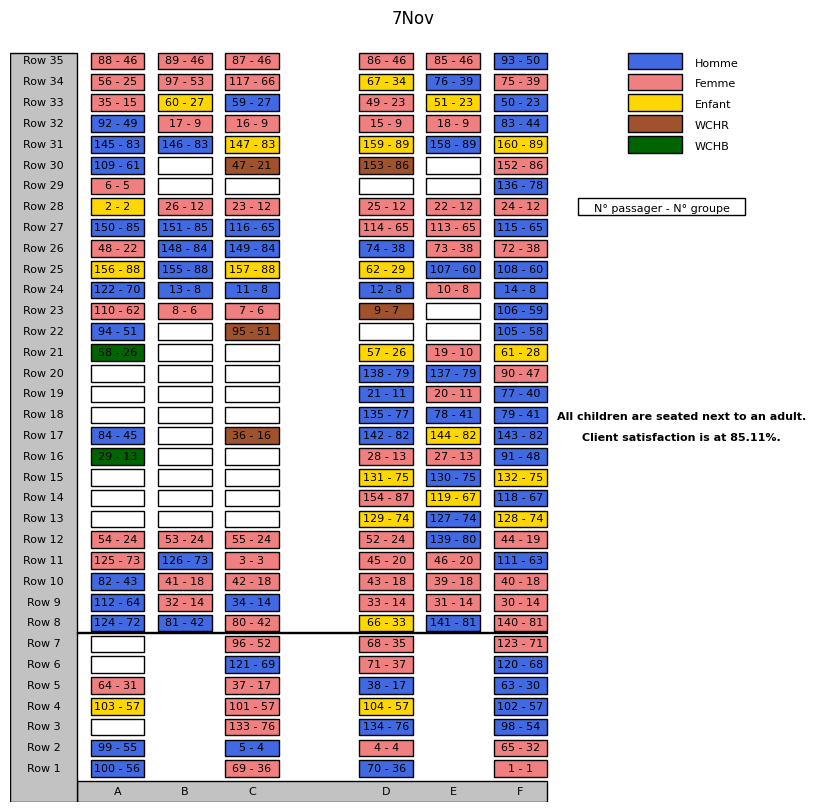

In [656]:
# Create a figure of the plane


fig, ax = plt.subplots(figsize=(10.4, 8 + 2*(data_file == "7Nov.csv")))

# Create a rectangle for the aircraft fuselage
ax.add_patch(plt.Rectangle((10, 0), 70, 10, facecolor='#c2c2c2', edgecolor='black'))
ax.add_patch(plt.Rectangle((0, 0), 10, 300 + 60 * (data_file == "7Nov.csv"), facecolor='#c2c2c2', edgecolor='black'))

# Dictionnaire des codes couleurs
code_couleur = {
    "Homme" : 'royalblue',
    "Femme" : 'lightcoral',
    "Enfant" : 'gold',
    "WCHR" : 'sienna',
    "WCHB" : 'darkgreen'
}

Seats = ["A","B","C","couloir","D","E","F"]


# Create rectangles for the seats
for row in range(1, Nb_rows + 1):
    if row == Nb_business_passengers//4 + 3 and Nb_business_passengers != 0:
     ax.add_patch(plt.Rectangle((10, y-1), 70, 0.5, fill=True,facecolor ='black', edgecolor='black'))

    for col in range(1, Nb_rows2 + 1):
        if (col == 4) or ((col == 2 or col == 6) and row <= Nb_business_passengers//4 + 1 and Nb_business_passengers != 0) :
            continue  # Skip over the aisles and business cabine fake seats
        x = 12 + (col - 1) * 10
        y = 12 + (row - 1) * 10

        if A[row-1 , col-1] == 0 :
            ax.add_patch(plt.Rectangle((x, y), 8, 8, fill=False, edgecolor='black'))
        else :
            ax.add_patch(plt.Rectangle((x, y), 8, 8, fill=True,facecolor =code_couleur[Passengers[A[row-1 , col-1]]['Type']], edgecolor='black'))

        # Plotting the passenger number and there group on the seat
        if A[row-1 , col-1] == 0 :
            plt.text(x + 4, y + 4, " ", ha='center', va='center', fontsize=8)
        else :
            seat_label = f"{int(A[row-1 , col-1])} - {Passengers[A[row-1 , col-1]]['Numero de groupe']}" 
            plt.text(x + 4, y + 4, seat_label, ha='center', va='center', fontsize=8)

# adding legend
for index, type in enumerate(code_couleur.keys()):
    ax.add_patch(plt.Rectangle((x + 20, y - 10*index), 8, 8, fill=True,facecolor =code_couleur[type], edgecolor='black'))
    plt.text(x + 30, y - 10*index + 3, type, ha='left', va='center', fontsize=8)

# adding rectangle to explain the numbers in each seat : Passenger number and Group ID
ax.add_patch(plt.Rectangle((x + 12.5, y - 70), 25, 8, fill=False, edgecolor='black'))
plt.text(x + 25, y - 67, "N° passager - N° groupe", ha='center', va='center', fontsize=8)

# Plotting child results and client satisfaction
plt.text(x + 28, y - 167, child_result,fontweight='bold', ha='center', va='center', fontsize=8)
plt.text(x + 28, y - 177, satisfaction_client,fontweight='bold', ha='center', va='center', fontsize=8)


# Label the rows and columns
for row in range(1, Nb_rows + 1):
    y = 12 + (row - 1) * 10
    plt.text(5, y + 4, f"Row {row}", ha='center', va='center', fontsize=8)
for col in range(1, Nb_rows2 + 1):
    if col == 4:
        continue  # Skip over the aisles
    
    x = 12 + (col - 1) * 10
    plt.text(x + 4, 5, Seats[col-1], ha='center', va='center', fontsize=8)

# Set the limits of the plot and remove the axes
ax.set_xlim(0, 120)
ax.set_ylim(0, 310 + 60*(data_file == "7Nov.csv"))
ax.axis('off')
# plt.legend(loc='upper right')
plt.title(date)


plt.show()
fig.savefig(f'{data_file[:-4]}.png')
